In [ ]:
# Just forging general schema

In [11]:
from twython import Twython
import pandas as pd
import json

# Getting tweets from user timeline
# ---------------------------------
def connect_to_twitter(twitter_auth_path):
    with open(twitter_auth_path, 'r') as f:
        twitter_auth = json.load(f)
        APP_KEY = twitter_auth['APP_KEY'] # your app key
        APP_SECRET = twitter_auth['APP_SECRET'] # your app secret
        OAUTH_TOKEN = twitter_auth['OAUTH_TOKEN'] # your oauth token
        OAUTH_TOKEN_SECRET = twitter_auth['OAUTH_TOKEN_SECRET'] # your oauth token secret
    twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    return twitter

# Pick intresting data from Twitter API response file
# ------------------------------------------------------
def get_tweet_data(tweet, tweet_data):        
    tweet_data['text'] = tweet['text']
    tweet_data['hashtags'] = get_hashtags_string(tweet)
    tweet_data['link'] = get_expanded_url_of_link_in_tweet(tweet)
    tweet_data['tweet_id'] = tweet['id']
    tweet_data['created_at'] = tweet['created_at']
    tweet_data['retweet_count'] = tweet['retweet_count']
    tweet_data['favorite_count'] = tweet['favorite_count']
    tweet_data['in_reply_to_status_id'] = tweet['in_reply_to_status_id']
    tweet_data['in_reply_to_screen_name'] = tweet['in_reply_to_screen_name']    
    return tweet_data

def get_tweet_author_data(tweet, tweet_data):
    tweet_data['author'] = tweet['user']['screen_name']
    tweet_data['account_created_at'] = tweet['user']['created_at']
    tweet_data['author_description'] = tweet['user']['description']
    tweet_data['author_id'] = tweet['user']['id']
    tweet_data['author_location'] = tweet['user']['location']
    tweet_data['author_statuses_count'] = tweet['user']['statuses_count']
    tweet_data['author_followers_count'] = tweet['user']['followers_count']
    tweet_data['author_friends_count'] = tweet['user']['friends_count']
    tweet_data['author_favourites_count'] = tweet['user']['favourites_count']
    tweet_data['author_listed_count'] = tweet['user']['listed_count']
    tweet_data['author_url'] = get_expanded_url_of_link_in_author_account(tweet)   
    return tweet_data

# Helpers for extracting Twitter API response file
# ------------------------------------------------
def get_hashtags_string(tweet):
    hashtags_string = ''
    for nr in range(len(tweet['entities']['hashtags'])):
        hashtags_string += tweet['entities']['hashtags'][nr]['text'] + ' '
    if not hashtags_string:
        hashtags_string = 'NO_HASHTAGS'
    return hashtags_string

def get_expanded_url_of_link_in_tweet(tweet):
    url = tweet['entities']['urls']
    if url:
        return url[0]['expanded_url']
    else:
        return None
    
def get_expanded_url_of_link_in_author_account(tweet):
    url = tweet['user']['entities']['url']['urls']
    if url:
        return url[0]['expanded_url']
    else:
        return None

# Save tweets dataset
# -------------------
def save_tweets_as_CSV(save_path, all_tweets_list, tweet_nr):
    tweet_df = pd.DataFrame(all_tweets_list)
    tweet_df.to_csv(save_path+'.csv', sep='\t', encoding='utf-8', index=False)
    print('{} tweets saved to {}'.format(tweet_nr, save_path+'.csv'))

def save_tweets_as_JSON(save_path, all_tweets, tweet_nr):
    with open(save_path+'.json', 'w') as f:
        json.dump(all_tweets, f)
        print('{} tweets saved to {}'.format(tweet_nr, save_path+'.json'))

# Main
# ----
def get_twitter_user_timeline(twitter, account_name):
    search_pages = twitter.cursor(twitter.get_user_timeline, screen_name=account_name, return_pages=True, count=200)
    return search_pages

def get_all_tweets_from_user_timelne(search_pages, save_path):
    try:
        all_tweets, all_tweets_list = {}, []
        tweet_nr, page_nr = 0, 0
        for page in search_pages:
            page_nr +=1
            for tweet in page:
                tweet_nr +=1
                tweet_data = {}
                tweet_data = get_tweet_data(tweet, tweet_data)
                tweet_data = get_tweet_author_data(tweet, tweet_data)
                all_tweets[str(tweet_nr)] = tweet_data
                all_tweets_list.append(tweet_data)
            print('Pages done: {}, tweets done: {}'.format(page_nr, tweet_nr))
    except:
        #pass
        save_tweets_as_JSON(save_path, all_tweets, tweet_nr)
    save_tweets_as_CSV(save_path, all_tweets_list, tweet_nr)

def get_user_tweets(account_name, save_path, twitter_auth_path):
    twitter = connect_to_twitter(twitter_auth_path)
    search_pages = get_twitter_user_timeline(twitter, account_name)
    get_all_tweets_from_user_timelne(search_pages, save_path)
    


In [12]:
# Example with A. Karpathy Twitter page
# -------------------------------------
get_user_tweets('karpathy' , 'karpathy_timeline_tweets', 'twitter_auth.json')

Pages done: 1, tweets done: 200
Pages done: 2, tweets done: 400
Pages done: 3, tweets done: 600
Pages done: 4, tweets done: 799
Pages done: 5, tweets done: 999
Pages done: 6, tweets done: 1199
Pages done: 7, tweets done: 1399
Pages done: 8, tweets done: 1599
Pages done: 9, tweets done: 1799
Pages done: 10, tweets done: 1999
Pages done: 11, tweets done: 2199
Pages done: 12, tweets done: 2399
Pages done: 13, tweets done: 2599
Pages done: 14, tweets done: 2799
Pages done: 15, tweets done: 2999
Pages done: 16, tweets done: 3199
Pages done: 17, tweets done: 3220
3220 tweets saved to karpathy_timeline_tweets.csv


/home/luke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: DeprecationWarning: generator 'Twython.cursor' raised StopIteration


In [13]:
# Example with Y. LeCun Twitter page
# ----------------------------------
get_user_tweets('ylecun' , 'ylecun_timeline_tweets', 'twitter_auth.json')

Pages done: 1, tweets done: 200
Pages done: 2, tweets done: 400
Pages done: 3, tweets done: 600
Pages done: 4, tweets done: 800
Pages done: 5, tweets done: 1000
Pages done: 6, tweets done: 1200
Pages done: 7, tweets done: 1400
Pages done: 8, tweets done: 1600
Pages done: 9, tweets done: 1800
Pages done: 10, tweets done: 2000
Pages done: 11, tweets done: 2199
Pages done: 12, tweets done: 2398
Pages done: 13, tweets done: 2598
Pages done: 14, tweets done: 2798
Pages done: 15, tweets done: 2998
Pages done: 16, tweets done: 3198
Pages done: 17, tweets done: 3246
3246 tweets saved to ylecun_timeline_tweets.csv


/home/luke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: DeprecationWarning: generator 'Twython.cursor' raised StopIteration


In [17]:
karpathy_df = pd.read_csv("karpathy_timeline_tweets.csv", sep='\t', )
ylecun_df = pd.read_csv("ylecun_timeline_tweets.csv", sep='\t', )

kdf = karpathy_df.copy(deep=True)
ydf = ylecun_df.copy(deep=True)

In [21]:
print(kdf.shape)
kdf.head(3)

(3220, 20)


,account_created_at,author,author_description,author_favourites_count,author_followers_count,author_friends_count,author_id,author_listed_count,author_location,author_statuses_count,author_url,created_at,favorite_count,hashtags,in_reply_to_screen_name,in_reply_to_status_id,link,retweet_count,text,tweet_id
0,Tue Apr 21 06:49:15 +0000 2009,karpathy,Director of AI at Tesla. Previously a Research...,2814,216549,495,33836629,3485,Stanford,6162,http://cs.stanford.edu/~karpathy/,Sat Jun 15 05:34:42 +0000 2019,0,NO_HASHTAGS,NaN,NaN,https://distill.pub/2019/activation-atlas/,122,RT @shancarter: A new way of looking inside vi...,1139768169441067008
1,Tue Apr 21 06:49:15 +0000 2009,karpathy,Director of AI at Tesla. Previously a Research...,2814,216549,495,33836629,3485,Stanford,6162,http://cs.stanford.edu/~karpathy/,Sat Jun 15 05:15:05 +0000 2019,19,NO_HASHTAGS,slashML,1.139472e+18,NaN,3,@slashML @MattDeitke @MattDeitke awesome!! :),1139763235077287937
2,Tue Apr 21 06:49:15 +0000 2009,karpathy,Director of AI at Tesla. Previously a Research...,2814,216549,495,33836629,3485,Stanford,6162,http://cs.stanford.edu/~karpathy/,Sat Jun 15 00:53:51 +0000 2019,951,NO_HASHTAGS,NaN,NaN,https://youtu.be/dKjCWfuvYxQ,260,Boston Dynamics: New Robots Now Fight Back htt...,1139697492277125120


In [22]:
print(ydf.shape)
ydf.head(3)

(3246, 20)


,account_created_at,author,author_description,author_favourites_count,author_followers_count,author_friends_count,author_id,author_listed_count,author_location,author_statuses_count,author_url,created_at,favorite_count,hashtags,in_reply_to_screen_name,in_reply_to_status_id,link,retweet_count,text,tweet_id
0,Wed Jun 17 16:05:51 +0000 2009,ylecun,NaN,2160,144042,219,48008938,2641,New York,3401,http://yann.lecun.com,Mon Jun 17 05:03:00 +0000 2019,0,NO_HASHTAGS,NaN,NaN,NaN,26,RT @RealAAAI: Fantastic night of @TheOfficialA...,1140484967866101763
1,Wed Jun 17 16:05:51 +0000 2009,ylecun,NaN,2160,144042,219,48008938,2641,New York,3401,http://yann.lecun.com,Mon Jun 17 02:26:28 +0000 2019,349,NO_HASHTAGS,NaN,NaN,https://twitter.com/i/web/status/1140445577408...,85,Berkeley/FAIR AI revolution slogans:\n- Jitend...,1140445577408327683
2,Wed Jun 17 16:05:51 +0000 2009,ylecun,NaN,2160,144042,219,48008938,2641,New York,3401,http://yann.lecun.com,Sun Jun 16 17:55:40 +0000 2019,0,NO_HASHTAGS,NaN,NaN,NaN,50,RT @theofpa: Jeff Dean of Google delivering th...,1140317030442098688


In [23]:
pd.options.display.max_colwidth = 300

In [28]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from pandas import Series
from matplotlib import pyplot

['created_at', 'favourite_count', 'retweet_count', 'hashtags', 'text', 'author_friends_count']


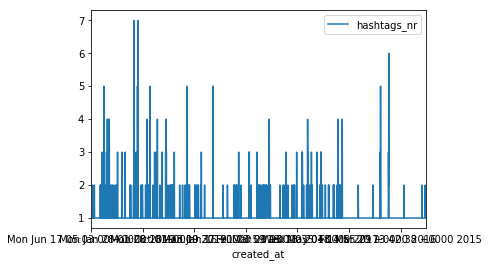

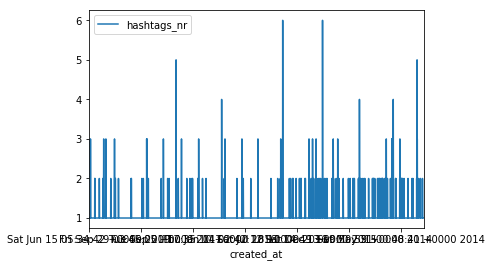

In [75]:
# TS comparsion schema

# Columns pick:
X = ['created_at', 'favourite_count', 'retweet_count', 'hashtags', 'text']
Y = ['author_friends_count']
columns = X + Y
ydf_part = ydf.loc[:,columns]
kdf_part = kdf.loc[:,columns]
print(columns)

# Feature engeneering example:
for df in [ydf_part, kdf_part]:
    df['text_length'] = df.text.str.len()
    df['hashtags_nr'] = df.hashtags.str.split(' ').apply(len)
    # Add features
    # ...

# Add more steps here
# ...
    
# Columns general display example:
for df in [ydf_part, kdf_part]:
    display(df.loc[:,['created_at', 'hashtags_nr']].plot(x='created_at'))
    
# Columns rename:
ydf_part.columns = list(['ydf_'+c for c in ydf_part.columns])
kdf_part.columns = list(['kdf_'+c for c in kdf_part.columns])

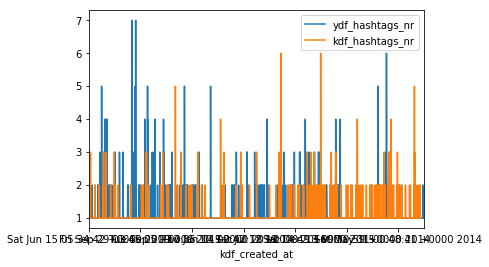

In [77]:
used_columns = ['created_at', 'hashtags_nr'] 
kdf_used_columns = [ 'kdf_'+c for c in used_columns ]
ydf_used_columns = [ 'ydf_'+c for c in used_columns ]

ax = ydf_part.loc[:,ydf_used_columns].plot(x=ydf_used_columns[0])
kdf_part.loc[:,kdf_used_columns].plot(ax=ax,x=kdf_used_columns[0])

In [ ]:
# To be continued

In [ ]:
# Well written macros found on web:

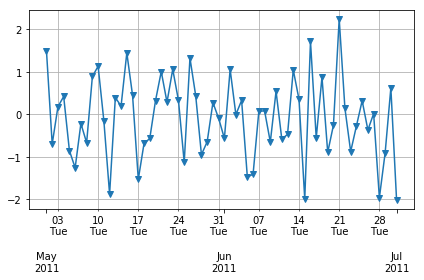

In [79]:
# Gentle time series X axis display method:
# Below code by bmu on stack: https://stackoverflow.com/questions/12945971/pandas-timeseries-plot-setting-x-axis-major-and-minor-ticks-and-labels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as dates

idx = pd.date_range('2011-05-01', '2011-07-01')
s = pd.Series(np.random.randn(len(idx)), index=idx)

fig, ax = plt.subplots()
ax.plot_date(idx.to_pydatetime(), s, 'v-')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
plt.tight_layout()
plt.show()